## Fourier Shell Correlation: measure the resolution of 2D/3D imaging data

Computes the Fourier Shell Correlation (FSC) between two given 2d- or
3d-images. In the 2D-setting this is also known as the Fourier Ring
correlation (FRC).

By comparing the FSC between two indepedent reconstructions
of an object from two different data sets to the 1/2-bit-threshold
curve, the achieved resolution can be estimated.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2923553/

See details of the implementation in the FSC.py file. 


### Example

##### Data:
X-ray tomogram 
pixel size = 1.625e-07  <br>
energy = 18 keV <br>
projections per degree = 10  <br>

FSC is cross-corrrelation between two 3D data-sets. They were reconstructed from same projection data. One tomo-set was reconstructed with odd projections (0.2 deg step), another one - with even. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from maximus48 import FSC


# load two data-sets for the comparison
folder = '/home/p3l-mpolikarpov/20191208/PROCESSED_DATA/FSC/'

outs = np.load(folder + 'Platy_9603_set1.npy', mmap_mode = 'r')
outs2 = np.load(folder + 'Platy_9603_set2.npy', mmap_mode = 'r')


# 2x downsampling to reduce calculation time
cut1 = outs[:, outs.shape[1]//4: 3*outs.shape[1]//4,
               outs.shape[2]//4: 3*outs.shape[2]//4]

cut2 = outs2[:,outs2.shape[1]//4: 3*outs2.shape[1]//4, 
               outs2.shape[2]//4: 3*outs2.shape[2]//4]

# calculate FSC
nu, frc = FSC.FSC(cut1, cut2)
# nu are frequencies 
# frc are FSC values

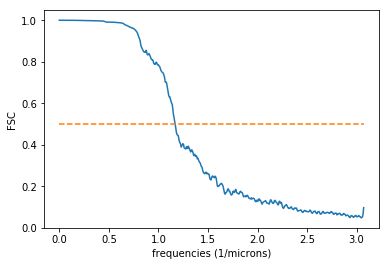

resolution is [0.855] microns


'\nFiles:\n\nPlaty-Platy_9901_40x_tomo3600_even.npy - tomo-recon with even projections proj[1::2]\nPlaty-Platy_9901_40x_tomo3600_odd.npy - tomo-recon with odd projections proj[0::2]\nPlaty-Platy_9901_40x_fsc1800_odd_even.npy - FSC result\n\nscript - FSC_Platy_superresolution5.py\n'

In [11]:
# plot results
pixel = 0.1625 * 1e-6

plt.plot(nu/0.1625, frc)
plt.plot(nu/0.1625, 0.5*np.ones(np.size(nu)), linestyle = 'dashed')
plt.ylabel('FSC')
plt.xlabel('frequencies (1/microns)')
plt.show()

# resolution measurement
number = np.argwhere(frc<=0.5)[0]
resolution = 1/nu[number] * pixel
print('resolution is %s microns' % str(resolution*1e6))